In [1]:
import pandas as pd
import os
import numpy as np
from datetime import datetime
from dateutil import parser
import seaborn as sns
from scipy.stats import norm
from scipy.stats import genextreme as gev
from scipy.stats import pareto 
from scipy import stats
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1

In [2]:
data=pd.read_csv(r'DV')
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1833-01-01,2.290,2.487,Kabul,Afghanistan,34.56N,70.05E
1,1833-02-01,3.319,2.325,Kabul,Afghanistan,34.56N,70.05E
2,1833-03-01,7.444,2.733,Kabul,Afghanistan,34.56N,70.05E
3,1833-04-01,13.576,2.266,Kabul,Afghanistan,34.56N,70.05E
4,1833-05-01,19.321,2.362,Kabul,Afghanistan,34.56N,70.05E
...,...,...,...,...,...,...,...
239175,2013/8/1,19.232,0.808,Harare,Zimbabwe,18.48S,30.42E
239176,2013/9/1,17.020,0.519,Harare,Zimbabwe,18.48S,30.42E
239177,2013/10/1,18.298,1.117,Harare,Zimbabwe,18.49S,30.42E
239178,2013/11/1,20.180,0.480,Harare,Zimbabwe,18.50S,30.42E


In [3]:
data=data.dropna(subset=['AverageTemperature'])
data=data.dropna(subset=['AverageTemperatureUncertainty'])
data=data.dropna(subset=['AverageTemperature'])
data=data.dropna(subset=['AverageTemperatureUncertainty'])
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1833-01-01,2.290,2.487,Kabul,Afghanistan,34.56N,70.05E
1,1833-02-01,3.319,2.325,Kabul,Afghanistan,34.56N,70.05E
2,1833-03-01,7.444,2.733,Kabul,Afghanistan,34.56N,70.05E
3,1833-04-01,13.576,2.266,Kabul,Afghanistan,34.56N,70.05E
4,1833-05-01,19.321,2.362,Kabul,Afghanistan,34.56N,70.05E
...,...,...,...,...,...,...,...
239175,2013/8/1,19.232,0.808,Harare,Zimbabwe,18.48S,30.42E
239176,2013/9/1,17.020,0.519,Harare,Zimbabwe,18.48S,30.42E
239177,2013/10/1,18.298,1.117,Harare,Zimbabwe,18.49S,30.42E
239178,2013/11/1,20.180,0.480,Harare,Zimbabwe,18.50S,30.42E


In [4]:
data['Latitude_NS']=data['Latitude'].apply(lambda  x:x[-1])
data['Latitude_number']=data['Latitude'].apply(lambda x:x[:-1])
data['Longitude_WE']=data['Longitude'].apply(lambda  x:x[-1])
data['Longitude_number']=data['Longitude'].apply(lambda x:x[:-1])
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Latitude_NS,Latitude_number,Longitude_WE,Longitude_number
0,1833-01-01,2.290,2.487,Kabul,Afghanistan,34.56N,70.05E,N,34.56,E,70.05
1,1833-02-01,3.319,2.325,Kabul,Afghanistan,34.56N,70.05E,N,34.56,E,70.05
2,1833-03-01,7.444,2.733,Kabul,Afghanistan,34.56N,70.05E,N,34.56,E,70.05
3,1833-04-01,13.576,2.266,Kabul,Afghanistan,34.56N,70.05E,N,34.56,E,70.05
4,1833-05-01,19.321,2.362,Kabul,Afghanistan,34.56N,70.05E,N,34.56,E,70.05
...,...,...,...,...,...,...,...,...,...,...,...
239175,2013/8/1,19.232,0.808,Harare,Zimbabwe,18.48S,30.42E,S,18.48,E,30.42
239176,2013/9/1,17.020,0.519,Harare,Zimbabwe,18.48S,30.42E,S,18.48,E,30.42
239177,2013/10/1,18.298,1.117,Harare,Zimbabwe,18.49S,30.42E,S,18.49,E,30.42
239178,2013/11/1,20.180,0.480,Harare,Zimbabwe,18.50S,30.42E,S,18.50,E,30.42


In [5]:
data['dt'] = pd.to_datetime(data['dt'])
data['YEAR'] = data['dt'].dt.year
data['Month'] = data['dt'].dt.month
data['Day'] = data['dt'].dt.day
data['DOW'] = data['dt'].dt.dayofweek
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Latitude_NS,Latitude_number,Longitude_WE,Longitude_number,YEAR,Month,Day,DOW
0,1833-01-01,2.290,2.487,Kabul,Afghanistan,34.56N,70.05E,N,34.56,E,70.05,1833,1,1,1
1,1833-02-01,3.319,2.325,Kabul,Afghanistan,34.56N,70.05E,N,34.56,E,70.05,1833,2,1,4
2,1833-03-01,7.444,2.733,Kabul,Afghanistan,34.56N,70.05E,N,34.56,E,70.05,1833,3,1,4
3,1833-04-01,13.576,2.266,Kabul,Afghanistan,34.56N,70.05E,N,34.56,E,70.05,1833,4,1,0
4,1833-05-01,19.321,2.362,Kabul,Afghanistan,34.56N,70.05E,N,34.56,E,70.05,1833,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239175,2013-08-01,19.232,0.808,Harare,Zimbabwe,18.48S,30.42E,S,18.48,E,30.42,2013,8,1,3
239176,2013-09-01,17.020,0.519,Harare,Zimbabwe,18.48S,30.42E,S,18.48,E,30.42,2013,9,1,6
239177,2013-10-01,18.298,1.117,Harare,Zimbabwe,18.49S,30.42E,S,18.49,E,30.42,2013,10,1,1
239178,2013-11-01,20.180,0.480,Harare,Zimbabwe,18.50S,30.42E,S,18.50,E,30.42,2013,11,1,4


In [6]:
AA=data[['YEAR','AverageTemperature']].groupby(by='YEAR',as_index=False).mean()
AA['AverageTemperature']=AA['AverageTemperature'].astype(np.float64)
A=AA.copy()
AA

,YEAR,AverageTemperature
0,1743,4.020077
1,1744,10.344192
2,1745,0.384885
3,1750,9.145748
4,1751,9.441240
...,...,...
262,2009,19.833752
263,2010,19.911734
264,2011,19.549197
265,2012,19.668239


In [7]:
for index,row in A.iterrows():
    try:
        if index>9:
            A.loc[index,'difference']=A.loc[index,'AverageTemperature']-A.loc[index-10,'AverageTemperature']
    except Exception as e:
        pass
A=A.dropna(subset=['difference'])
A

,YEAR,AverageTemperature,difference
10,1757,9.248915,5.228838
11,1758,7.892749,-2.451444
12,1759,8.956683,8.571799
13,1760,8.209619,-0.936129
14,1761,9.467195,0.025955
...,...,...,...
262,2009,19.833752,0.134792
263,2010,19.911734,0.405491
264,2011,19.549197,-0.130155
265,2012,19.668239,-0.187446


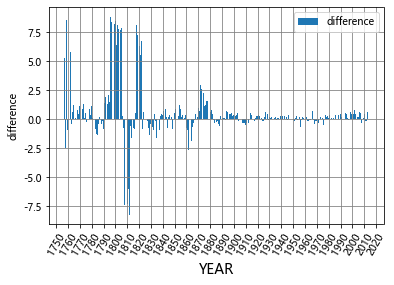

In [8]:
plt.rcParams['font.family'] = ['Arial Unicode MS','Microsoft YaHei','SimHei','sans-serif']
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.grid(color='gray')
ax.bar(A['YEAR'], A['difference'], label='difference')    # ①
plt.xticks(A['YEAR'],rotation=60)
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('difference')
plt.legend(loc=0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.show()

In [9]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
rows=[]
with open(r"C:\Users\Orange\Desktop\new 3.txt",'r+') as f:
    for line in f.readlines():
        if  line.strip().startswith('Year'):
            columns = line.strip().split(',')
            # print(columns)
        else:
            row = [i for i in line.strip().split(' ') if i]
            # print(row)
            rows.append(row)
# print(rows)
B=pd.DataFrame(columns=columns,data=rows)
B

,Year,Month,Anomaly,Unc.,Anomaly,Unc.,Anomaly,Unc.,Anomaly,Unc.,Anomaly,Unc.
0,2004,1,0.974,0.046,0.817,0.031,0.899,0.022,0.862,0.022,0.830,0.022
1,2004,2,1.294,0.077,0.778,0.029,0.907,0.022,0.858,0.022,0.833,0.022
2,2004,3,1.032,0.072,0.754,0.030,0.910,0.023,0.862,0.022,0.835,0.022
3,2004,4,0.935,0.051,0.735,0.029,0.918,0.023,0.867,0.023,0.837,0.022
4,2004,5,0.219,0.041,0.788,0.026,0.912,0.023,0.871,0.023,0.841,0.022
5,2004,6,0.436,0.075,0.715,0.023,0.920,0.023,0.873,0.023,0.841,0.022
6,2004,7,-0.051,0.069,0.736,0.019,0.930,0.024,0.876,0.024,0.842,0.022
7,2004,8,0.331,0.054,0.690,0.016,0.922,0.023,0.879,0.024,0.846,0.022
8,2004,9,0.557,0.081,0.708,0.016,0.916,0.022,0.883,0.024,0.849,0.022
9,2004,10,0.957,0.066,0.735,0.017,0.925,0.022,0.885,0.024,0.850,0.022


In [10]:
B=B.iloc[:,[0,1,2,3]]
B.rename(columns={'  Anomaly':'AverageTemperature'},inplace=True)
B['AverageTemperature']=B['AverageTemperature'].astype(np.float64)
C=B[['Year','AverageTemperature']].groupby(by='Year',as_index=False).mean()
C

,Year,AverageTemperature
0,2004,0.715917
1,2005,1.095167
2,2006,0.920833
3,2007,1.122417
4,2008,0.834250
5,2009,0.923167
6,2010,1.096833
7,2011,0.921583
8,2012,0.879500
9,2013,0.993750


In [11]:

for index,row in C.iterrows():
    try:
        if index>9:
            C.loc[index,'difference']=C.loc[index,'AverageTemperature']-C.loc[index-10,'AverageTemperature']
    except Exception as e:
        pass
#C=C.iloc[[10,11,12,13,14,15,16,17,18],:]
C=C.dropna(subset=['difference'])
C.rename(columns={'Year':'YEAR'},inplace=True)
C

,YEAR,AverageTemperature,difference
10,2014,0.965000,0.249083
11,2015,1.222333,0.127167
12,2016,1.417667,0.496833
13,2017,1.293083,0.170667
14,2018,1.128667,0.294417
15,2019,1.326250,0.403083
16,2020,1.483333,0.386500
17,2021,1.229750,0.308167
18,2022,1.522000,0.642500


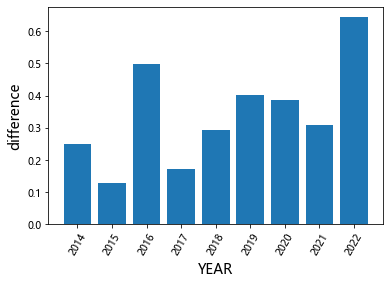

In [12]:
plt.bar(C['YEAR'], C['difference'])
plt.xticks(C['YEAR'],rotation=60)
plt.ylabel('difference', fontsize=14)
plt.xlabel('YEAR', fontsize=14,)
plt.show()

In [13]:
D=pd.concat([A,C],ignore_index=True)
D

,YEAR,AverageTemperature,difference
0,1757,9.248915,5.228838
1,1758,7.892749,-2.451444
2,1759,8.956683,8.571799
3,1760,8.209619,-0.936129
4,1761,9.467195,0.025955
5,1762,9.151437,5.776681
6,1763,8.635227,-0.429095
7,1764,9.840124,0.586861
8,1765,9.570222,1.241516
9,1766,9.799989,0.066858


In [14]:
D['AverageTemperature']=D['AverageTemperature'].astype(np.float64)

In [15]:
D['YEAR']=D['YEAR'].astype(np.float64)

In [16]:
#zhexiantu
#plt.plot(D['YEAR'], D['difference'])
#plt.title('Unemployment Rate Vs Year')
#plt.xlabel('dYEAR')
#plt.ylabel('difference')
#plt.show()

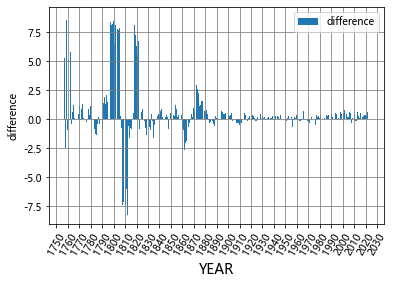

In [17]:
import matplotlib.ticker as ticker
plt.rcParams['font.family'] = ['Arial Unicode MS','Microsoft YaHei','SimHei','sans-serif']
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.grid(color='gray')
ax.bar(D['YEAR'], D['difference'], label='difference')    # ①
plt.xticks(D['YEAR'],rotation=60)
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('difference')
plt.legend(loc=0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.show()

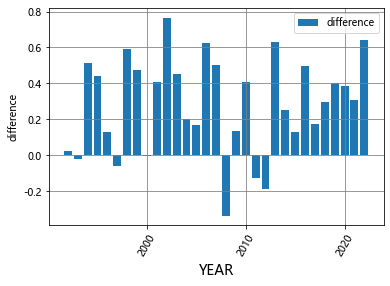

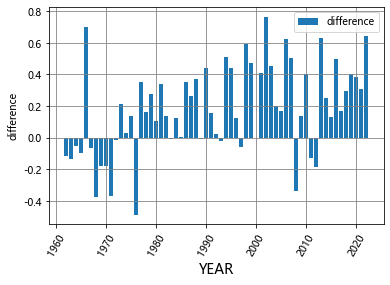

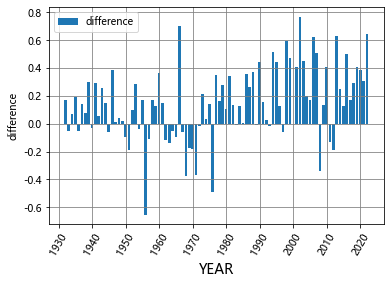

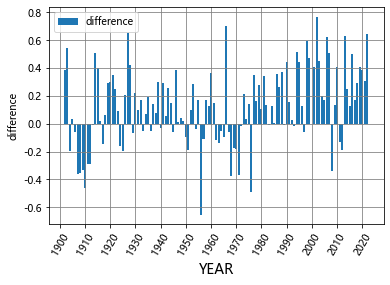

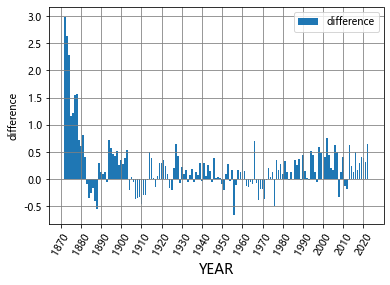

In [18]:
D1=D[D['YEAR']>=1992]
import matplotlib.ticker as ticker
plt.rcParams['font.family'] = ['Arial Unicode MS','Microsoft YaHei','SimHei','sans-serif']
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.grid(color='gray')
ax.bar(D1['YEAR'], D1['difference'], label='difference')    # ①
plt.xticks(D1['YEAR'],rotation=60)
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('difference')
plt.legend(loc=0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.show()


D2=D[D['YEAR']>=1962]
import matplotlib.ticker as ticker
plt.rcParams['font.family'] = ['Arial Unicode MS','Microsoft YaHei','SimHei','sans-serif']
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.grid(color='gray')
ax.bar(D2['YEAR'], D2['difference'], label='difference')    # ①
plt.xticks(D2['YEAR'],rotation=60)
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('difference')
plt.legend(loc=0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.show()


D3=D[D['YEAR']>=1932]
import matplotlib.ticker as ticker
plt.rcParams['font.family'] = ['Arial Unicode MS','Microsoft YaHei','SimHei','sans-serif']
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.grid(color='gray')
ax.bar(D3['YEAR'], D3['difference'], label='difference')    # ①
plt.xticks(D3['YEAR'],rotation=60)
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('difference')
plt.legend(loc=0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.show()


D4=D[D['YEAR']>=1902]
import matplotlib.ticker as ticker
plt.rcParams['font.family'] = ['Arial Unicode MS','Microsoft YaHei','SimHei','sans-serif']
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.grid(color='gray')
ax.bar(D4['YEAR'], D4['difference'], label='difference')    # ①
plt.xticks(D4['YEAR'],rotation=60)
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('difference')
plt.legend(loc=0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.show()


D5=D[D['YEAR']>=1872]
import matplotlib.ticker as ticker
plt.rcParams['font.family'] = ['Arial Unicode MS','Microsoft YaHei','SimHei','sans-serif']
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.grid(color='gray')
ax.bar(D5['YEAR'], D5['difference'], label='difference')    # ①
plt.xticks(D5['YEAR'],rotation=60)
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('difference')
plt.legend(loc=0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.show()



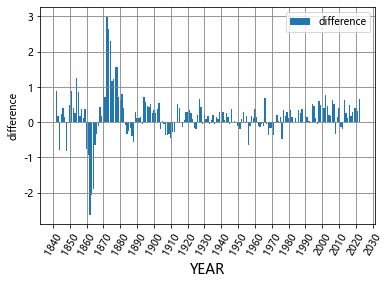

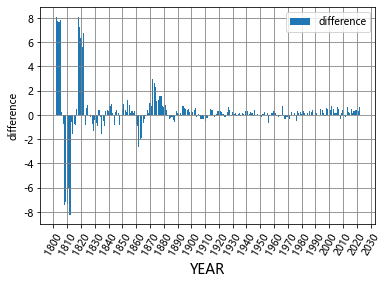

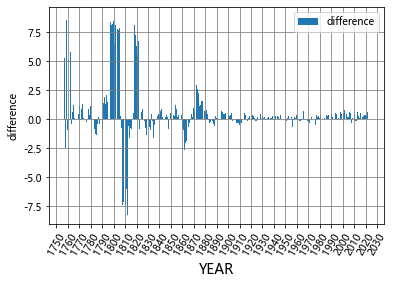

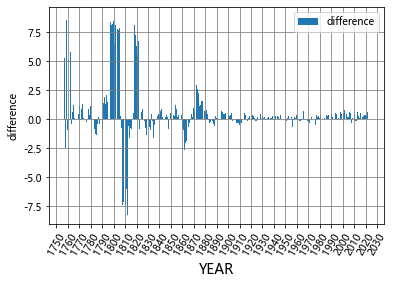

In [19]:

D6=D[D['YEAR']>=1842]
import matplotlib.ticker as ticker
plt.rcParams['font.family'] = ['Arial Unicode MS','Microsoft YaHei','SimHei','sans-serif']
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.grid(color='gray')
ax.bar(D6['YEAR'], D6['difference'], label='difference')    # ①
plt.xticks(D6['YEAR'],rotation=60)
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('difference')
plt.legend(loc=0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.show()


D7=D[D['YEAR']>=1802]
import matplotlib.ticker as ticker
plt.rcParams['font.family'] = ['Arial Unicode MS','Microsoft YaHei','SimHei','sans-serif']
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.grid(color='gray')
ax.bar(D7['YEAR'], D7['difference'], label='difference')    # ①
plt.xticks(D7['YEAR'],rotation=60)
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('difference')
plt.legend(loc=0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.show()


D7=D[D['YEAR']>=12]
import matplotlib.ticker as ticker
plt.rcParams['font.family'] = ['Arial Unicode MS','Microsoft YaHei','SimHei','sans-serif']
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.grid(color='gray')
ax.bar(D7['YEAR'], D7['difference'], label='difference')    # ①
plt.xticks(D7['YEAR'],rotation=60)
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('difference')
plt.legend(loc=0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.show()

import matplotlib.ticker as ticker
plt.rcParams['font.family'] = ['Arial Unicode MS','Microsoft YaHei','SimHei','sans-serif']
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.grid(color='gray')
ax.bar(D['YEAR'], D['difference'], label='difference')    # ①
plt.xticks(D['YEAR'],rotation=60)
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('difference')
plt.legend(loc=0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.show()

# 2

In [20]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math
import os 
import seaborn as sns #for styling the plots
import warnings
import urllib.request
%matplotlib inline

In [21]:
AA

,YEAR,AverageTemperature
0,1743,4.020077
1,1744,10.344192
2,1745,0.384885
3,1750,9.145748
4,1751,9.441240
5,1752,3.374756
6,1753,9.064321
7,1754,9.253263
8,1755,8.328706
9,1756,9.733131


<AxesSubplot:xlabel='YEAR', ylabel='AverageTemperature'>

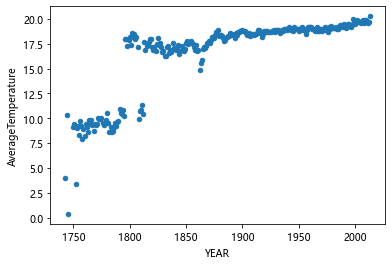

In [22]:
AA.plot(x='YEAR',y='AverageTemperature',kind='scatter')

In [23]:
lm1 = smf.ols(formula='AverageTemperature~YEAR', data = AA).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:     AverageTemperature   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     465.0
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           3.02e-60
Time:                        03:06:23   Log-Likelihood:                -603.48
No. Observations:                 267   AIC:                             1211.
Df Residuals:                     265   BIC:                             1218.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -58.3699      3.475    -16.799      0.0

In [24]:
AA['predict_AverageTemperature']=lm1.predict()
AA[['YEAR','AverageTemperature','predict_AverageTemperature']]

,YEAR,AverageTemperature,predict_AverageTemperature
0,1743,4.020077,11.035328
1,1744,10.344192,11.075148
2,1745,0.384885,11.114967
3,1750,9.145748,11.314064
4,1751,9.441240,11.353883
5,1752,3.374756,11.393703
6,1753,9.064321,11.433522
7,1754,9.253263,11.473342
8,1755,8.328706,11.513161
9,1756,9.733131,11.552980


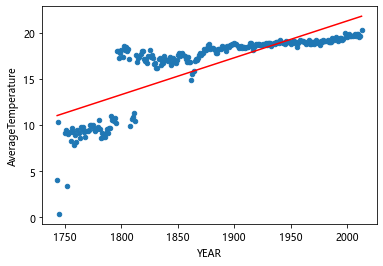

In [25]:
fig, ax = plt.subplots() #get axis to plot on
AA.plot(ax=ax,kind='scatter',x='YEAR', y='AverageTemperature') #show the data
ax.plot(AA['YEAR'],AA['predict_AverageTemperature'],'r-'); #show the regression line

In [26]:
E=AA[['YEAR','predict_AverageTemperature']]
E

,YEAR,predict_AverageTemperature
0,1743,11.035328
1,1744,11.075148
2,1745,11.114967
3,1750,11.314064
4,1751,11.353883
5,1752,11.393703
6,1753,11.433522
7,1754,11.473342
8,1755,11.513161
9,1756,11.552980


In [27]:

#E1=pd.DataFrame(index=E.index,columns=E.columns)


In [28]:
from sklearn import datasets, linear_model
def linear_model_main(X_parameters, Y_parameters, predict_value):
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X_parameters, Y_parameters)
    predict_outcome = regr.predict(np.array(predict_value).reshape(-1,1))
    return predict_outcome
AB=A.copy()
AB=AB.reset_index(drop=True)
#print(AB)
predictvalue = [i for i in range(2014,2110)]
#print(predictvalue)
for i  in predictvalue:
    result = linear_model_main(np.array(A['YEAR']).reshape(-1, 1),np.array(A['AverageTemperature']).reshape(-1, 1),i)
    #print(result,result.flatten().tolist())
    for j in result.flatten().tolist():
        AB.loc[len(AB.index)]=[i,np.NAN,j]
AB['YEAR']=AB['YEAR'].astype(np.int64)
AB=AB[AB['YEAR']>=2014]
AB

,YEAR,AverageTemperature,difference
257,2014,NaN,21.483912
258,2015,NaN,21.519865
259,2016,NaN,21.555818
260,2017,NaN,21.591771
261,2018,NaN,21.627724
262,2019,NaN,21.663676
263,2020,NaN,21.699629
264,2021,NaN,21.735582
265,2022,NaN,21.771535
266,2023,NaN,21.807488


In [29]:
AB1=AB[['YEAR','difference']]
AB1.rename(columns={'difference':'predict_AverageTemperature'},inplace=True)
AB1

,YEAR,predict_AverageTemperature
257,2014,21.483912
258,2015,21.519865
259,2016,21.555818
260,2017,21.591771
261,2018,21.627724
262,2019,21.663676
263,2020,21.699629
264,2021,21.735582
265,2022,21.771535
266,2023,21.807488


# 3

In [36]:
G=data[['AverageTemperature']].groupby(by=[data['Country'],data['YEAR']]).mean()
G=G.reset_index()
G

,Country,YEAR,AverageTemperature
0,Afghanistan,1833,13.914333
1,Afghanistan,1834,13.914500
2,Afghanistan,1835,14.707167
3,Afghanistan,1837,15.467333
4,Afghanistan,1838,18.504429
5,Afghanistan,1840,13.695818
6,Afghanistan,1841,14.166800
7,Afghanistan,1842,15.374444
8,Afghanistan,1843,14.071167
9,Afghanistan,1844,13.404750


In [37]:
ML=['Afghanistan','Angola','Australia','Bangladesh','Brazil','Burma','Canada','Chile','China',
'Colombia','Congo (Democratic Republic Of The)','Dominican Republic',
'Egypt','Ethiopia','France','Germany','India','Indonesia','Iran','Iraq','Italy','Ivory Coast','Japan','Kenya','Mexico','Morocco','Nigeria',
'Pakistan','Peru','Philippines','Russia','Saudi Arabia','Senegal','Singapore','Somalia','South Africa','South Korea',
'Spain','Sudan','Syria','Tanzania','Thailand','Turkey','Ukraine','United Kingdom','United States','Vietnam','Zimbabwe']
j=0
G1=pd.DataFrame(columns=['Country','Correlation coefficient'])
for i in ML:
    corrXY = np.corrcoef(G[G['Country']==i]['AverageTemperature'],G[G['Country']==i]['YEAR'])[0,1]
    G1.loc[len(G1.index)]=[i, corrXY]
    j=j+1


In [38]:
G1

,Country,Correlation coefficient
0,Afghanistan,0.478649
1,Angola,0.700380
2,Australia,0.659491
3,Bangladesh,0.594339
4,Brazil,0.453364
5,Burma,0.706062
6,Canada,0.450236
7,Chile,0.711131
8,China,0.726256
9,Colombia,0.770243


In [39]:
G2=G1.copy()
G2.loc[10,'Country']='Congo'
G2

,Country,Correlation coefficient
0,Afghanistan,0.478649
1,Angola,0.700380
2,Australia,0.659491
3,Bangladesh,0.594339
4,Brazil,0.453364
5,Burma,0.706062
6,Canada,0.450236
7,Chile,0.711131
8,China,0.726256
9,Colombia,0.770243


In [40]:
!pip install pyecharts

In [41]:
from pyecharts import options as opts
from pyecharts.charts import Map
import random
from pyecharts.charts import Bar # 条形 

In [42]:
def create_world_map():
 
    (   
        Map()
        .add(
            series_name="Correlationcoefficient", 
            data_pair=G2.values.tolist(), 
            maptype="world", 
        )
       
        
        .set_global_opts(
            
            title_opts=opts.TitleOpts(title="Global Map"),
            
            visualmap_opts=opts.VisualMapOpts(max_=1, is_piecewise=False),
        )
        
        .set_series_opts(
            
            label_opts=opts.LabelOpts(is_show=False, color="blue")
        )
        
        .render("Global Map.html")
    )

create_world_map()

In [138]:
def create_world_map():
 
    MAP=(   
        Map()
        .add(
            series_name="Correlationcoefficient", 
            data_pair=G2.values.tolist(), 
            maptype="world", 
        )
       
        
        .set_global_opts(
            
            title_opts=opts.TitleOpts(title=" Global Map"),
            
            visualmap_opts=opts.VisualMapOpts(max_=1, is_piecewise=False),
        )
        
        .set_series_opts(
            
            label_opts=opts.LabelOpts(is_show=False, color="blue")
        )
        
    )
    return MAP
MAP=create_world_map()
MAP.render_notebook()

In [47]:
L_N=data[data['Latitude_NS']=='N']
L_S=data[data['Latitude_NS']=='S']

L_W=data[data['Longitude_WE']=='W']
L_E=data[data['Longitude_WE']=='E']

In [48]:
corrL_N= np.corrcoef(L_N['AverageTemperature'],L_N['YEAR'])[0,1]
corrL_N

0.13974979563365703

In [49]:
corrL_S= np.corrcoef(L_S['AverageTemperature'],L_S['YEAR'])[0,1]
corrL_S

0.0739515670008879

In [50]:
corrL_W= np.corrcoef(L_W['AverageTemperature'],L_W['YEAR'])[0,1]
corrL_W

0.24742731140279048

In [51]:
corrL_E= np.corrcoef(L_E['AverageTemperature'],L_E['YEAR'])[0,1]
corrL_E

0.11484819675903343

In [52]:
corrdata= np.corrcoef(data['AverageTemperature'],data['YEAR'])[0,1]
corrdata

0.14669116307548685